In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
demo1 = pd.read_csv('api_data_aadhar_demographic_0_500000.csv')
demo2 = pd.read_csv('api_data_aadhar_demographic_500000_1000000.csv')
demo3 = pd.read_csv('api_data_aadhar_demographic_1000000_1500000.csv')
demo4 = pd.read_csv('api_data_aadhar_demographic_1500000_2000000.csv')
demo5 = pd.read_csv('api_data_aadhar_demographic_2000000_2071700.csv')

In [3]:
demo_combined = pd.concat([demo1,demo2,demo3,demo4,demo5], ignore_index = True)

In [4]:
df = demo_combined.copy()

In [5]:
df.shape

(2071700, 6)

In [6]:
df.head(4)

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314


In [7]:
df.isnull().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [8]:
df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [9]:
df.dtypes

date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

In [10]:
df.rename(columns = {
    'demo_age_17_' : 'age_17_plus_count',
    'demo_age_5_17' : 'age_5_17_count'
}, inplace = True)

In [11]:
df.columns.tolist()

['date', 'state', 'district', 'pincode', 'age_5_17_count', 'age_17_plus_count']

In [12]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, errors = 'coerce')

In [13]:
df['date'].isna().sum()

np.int64(0)

In [14]:
df.dtypes
# df['date'].min(), df['date'].max()

date                 datetime64[ns]
state                        object
district                     object
pincode                       int64
age_5_17_count                int64
age_17_plus_count             int64
dtype: object

In [15]:
df['pincode'] = df['pincode'].astype(str)

In [16]:
df['state'] = df['state'].str.strip().str.lower()
df['district'] = df['district'].str.strip().str.lower()

In [17]:
df.head(3)

,date,state,district,pincode,age_5_17_count,age_17_plus_count
0,2025-03-01,uttar pradesh,gorakhpur,273213,49,529
1,2025-03-01,andhra pradesh,chittoor,517132,22,375
2,2025-03-01,gujarat,rajkot,360006,65,765


In [18]:
df.duplicated().sum()

np.int64(473688)

In [19]:
df[df.duplicated()].head()

,date,state,district,pincode,age_5_17_count,age_17_plus_count
182369,2025-12-06,odisha,jajpur,755020,0,1
219406,2025-11-10,west bengal,south 24 parganas,743368,0,1
227394,2025-10-26,tamil nadu,krishnagiri,635207,6,17
227395,2025-10-26,tamil nadu,krishnagiri,635306,6,3
227396,2025-10-26,tamil nadu,krishnagiri,635307,5,17


In [20]:
df = df.drop_duplicates().reset_index(drop = True)

In [21]:
df['state'].unique()

array(['uttar pradesh', 'andhra pradesh', 'gujarat', 'rajasthan',
       'karnataka', 'west bengal', 'telangana', 'odisha', 'maharashtra',
       'kerala', 'bihar', 'tamil nadu', 'madhya pradesh', 'assam',
       'tripura', 'arunachal pradesh', 'punjab', 'jharkhand', 'delhi',
       'chandigarh', 'chhattisgarh', 'jammu and kashmir', 'mizoram',
       'nagaland', 'himachal pradesh', 'goa', 'haryana', 'meghalaya',
       'uttarakhand', 'manipur', 'daman and diu', 'puducherry', 'sikkim',
       'ladakh', 'dadra and nagar haveli and daman and diu',
       'dadra and nagar haveli', 'orissa', 'pondicherry',
       'andaman & nicobar islands', 'andaman and nicobar islands',
       'daman & diu', 'west  bengal', 'jammu & kashmir', 'lakshadweep',
       'dadra & nagar haveli', 'westbengal', 'west bangal', 'chhatisgarh',
       'west bengli', 'darbhanga', 'puttenahalli', 'balanagar',
       'uttaranchal', '100000', 'jaipur', 'madanapalle', 'nagpur',
       'raja annamalai puram'], dtype=object)

In [22]:
df['state_clean'] = df['state'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)

In [23]:
valid_states = [
    "andhrapradesh","arunachalpradesh","assam","bihar","chhattisgarh",
    "goa","gujarat","haryana","himachalpradesh","jharkhand",
    "karnataka","kerala","madhyapradesh","maharashtra","manipur",
    "meghalaya","mizoram","nagaland","odisha","punjab",
    "rajasthan","sikkim","tamilnadu","telangana","tripura",
    "uttarpradesh","uttarakhand","westbengal",
    "jammuandkashmir","delhi"
]

from rapidfuzz import process
unique_state = df['state_clean'].unique()

mapping = {
    messy: process.extractOne(messy, valid_states, score_cutoff = 75)[0]
    if process.extractOne(messy, valid_states, score_cutoff = 75) else messy
    for messy in unique_state
    }

df['state_final'] = df['state_clean'].map(mapping)

In [24]:
df['state_final'].unique()

array(['uttarpradesh', 'andhrapradesh', 'gujarat', 'rajasthan',
       'karnataka', 'westbengal', 'telangana', 'odisha', 'maharashtra',
       'kerala', 'bihar', 'tamilnadu', 'madhyapradesh', 'assam',
       'tripura', 'arunachalpradesh', 'punjab', 'jharkhand', 'delhi',
       'chandigarh', 'chhattisgarh', 'jammuandkashmir', 'mizoram',
       'nagaland', 'himachalpradesh', 'goa', 'haryana', 'meghalaya',
       'uttarakhand', 'manipur', 'damananddiu', 'puducherry', 'sikkim',
       'ladakh', 'dadraandnagarhavelianddamananddiu',
       'dadraandnagarhaveli', 'orissa', 'pondicherry',
       'andamannicobarislands', 'andamanandnicobarislands', 'damandiu',
       'lakshadweep', 'dadranagarhaveli', 'darbhanga', 'puttenahalli',
       'balanagar', 'uttaranchal', '', 'madanapalle', 'nagpur',
       'rajaannamalaipuram'], dtype=object)

In [25]:
df['state_final'] = df['state_final'].replace({
    "orissa": "odisha",
    "pondicherry": "puducherry",
    "andamannicobarislands": "andamanandnicobarislands",
    "damananddiu": "dadraandnagarhavelianddamananddiu",
    "damandiu": "dadraandnagarhavelianddamananddiu",
    "dadraandnagarhaveli": "dadraandnagarhavelianddamananddiu",
    "dadranagarhaveli": "dadraandnagarhavelianddamananddiu"
})

In [26]:
df['state_final'].value_counts()

state_final
andhrapradesh                        154789
tamilnadu                            153333
uttarpradesh                         132366
maharashtra                          126303
westbengal                           125013
karnataka                            120403
odisha                                82463
kerala                                82186
gujarat                               75161
bihar                                 74536
telangana                             70098
rajasthan                             68455
madhyapradesh                         60157
assam                                 47408
punjab                                38097
jharkhand                             31225
chhattisgarh                          27288
haryana                               22341
himachalpradesh                       21940
uttarakhand                           17710
jammuandkashmir                       16015
delhi                                  8066
tripura             

In [27]:
df = df[df['state_final'].map(df['state_final'].value_counts())>1]

In [28]:
df = df[df['state_final'].notna()]
df = df[df['state_final'] != '']
df = df[df['state_final'].str.len() > 0]

In [29]:
df.head()

,date,state,district,pincode,age_5_17_count,age_17_plus_count,state_clean,state_final
0,2025-03-01,uttar pradesh,gorakhpur,273213,49,529,uttarpradesh,uttarpradesh
1,2025-03-01,andhra pradesh,chittoor,517132,22,375,andhrapradesh,andhrapradesh
2,2025-03-01,gujarat,rajkot,360006,65,765,gujarat,gujarat
3,2025-03-01,andhra pradesh,srikakulam,532484,24,314,andhrapradesh,andhrapradesh
4,2025-03-01,rajasthan,udaipur,313801,45,785,rajasthan,rajasthan


In [30]:
df['total_updates'] = df['age_5_17_count'] + df['age_17_plus_count']
# Total number of people who updated their demograhic details.

In [31]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [32]:
df.groupby('pincode')['state_final'].nunique().max()

np.int64(2)

In [33]:
bad_pincodes = df.groupby('pincode')['state_final'].nunique()
bad_pincodes = bad_pincodes[bad_pincodes > 1]
bad_pincodes

pincode
140603    2
140901    2
160003    2
160014    2
160055    2
         ..
756084    2
781129    2
781131    2
783123    2
783134    2
Name: state_final, Length: 698, dtype: int64

In [34]:
df[df['pincode'].isin(bad_pincodes.index)][['pincode', 'state_final']].sort_values('pincode') 



,pincode,state_final
908807,140603,punjab
415178,140603,punjab
885377,140603,punjab
380325,140603,punjab
700202,140603,punjab
...,...,...
1145131,783134,assam
104862,783134,meghalaya
646758,783134,assam
1143352,783134,assam


In [35]:
for pin in bad_pincodes.index: 
    correct_state = (df[df['pincode'] == pin]['state_final'].value_counts().idxmax()) 
    df.loc[df['pincode'] == pin, 'state_final'] = correct_state 
    

In [36]:
df.head()
# data cleaning done

,date,state,district,pincode,age_5_17_count,age_17_plus_count,state_clean,state_final,total_updates,day,month,year
0,2025-03-01,uttar pradesh,gorakhpur,273213,49,529,uttarpradesh,uttarpradesh,578,1,3,2025
1,2025-03-01,andhra pradesh,chittoor,517132,22,375,andhrapradesh,andhrapradesh,397,1,3,2025
2,2025-03-01,gujarat,rajkot,360006,65,765,gujarat,gujarat,830,1,3,2025
3,2025-03-01,andhra pradesh,srikakulam,532484,24,314,andhrapradesh,andhrapradesh,338,1,3,2025
4,2025-03-01,rajasthan,udaipur,313801,45,785,rajasthan,rajasthan,830,1,3,2025


In [37]:
df['district'].unique()

array(['gorakhpur', 'chittoor', 'rajkot', 'srikakulam', 'udaipur',
       'sikar', 'tumakuru', 'kurnool', 'paschim medinipur', 'ghazipur',
       'patan', 'mulugu', 'ganganagar', 'nayagarh', 'nashik',
       'shivamogga', 'thrissur', 'hassan', 'patna', 'belgaum',
       'kancheepuram', 'jabalpur', 'chennai', 'tinsukia', 'jamui', 'gaya',
       'bengaluru', 'tiruppur', 'jalgaon', 'dhalai', 'nabarangapur',
       'chittorgarh', 'darbhanga', 'purnia', 'muzaffarnagar', 'jaipur',
       'churu', 'bharatpur', 'jamnagar', 'howrah', 'ahmedabad',
       'west kameng', 'jalor', 'belagavi', 'bahraich', 'nagapattinam',
       'sheikhpura', 'amritsar', 'mysore', 'alluri sitharama raju',
       'sitamarhi', 'khunti', 'saharanpur', 'kanyakumari', 'prakasam',
       'ananthapuramu', 'hooghly', 'central delhi', 'deoria', 'giridih',
       'koraput', 'shahjahanpur', 'chhotaudepur', 'jalandhar', 'kannauj',
       'visakhapatnam', 'jodhpur', 'karimnagar', 'amethi', 'hyderabad',
       'salem', 'cuddalore'

In [39]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_5_17_count',
       'age_17_plus_count', 'state_clean', 'state_final', 'total_updates',
       'day', 'month', 'year'],
      dtype='object')

In [41]:
df['district'].value_counts()

district
pune                     9634
north 24 parganas        9559
thrissur                 9496
barddhaman               9361
east godavari            8967
                         ... 
bally jagachha              1
jyotiba phule nagar *       1
near meera hospital         1
bandipur                    1
medchalâmalkajgiri        1
Name: count, Length: 954, dtype: int64

In [42]:
df['district_clean'] = df['district'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex = True)

In [43]:
df['district_clean'] = df['district_clean'].str.replace(r'\s+', ' ', regex = True)

In [44]:
import unicodedata

df['district_clean'] = (df['district'].astype(str).apply(lambda x: unicodedata.normalize('NFKD', x)))

# to fix the encoded hypen in a the last district name

In [45]:
df['district_clean'] = (df['district_clean'].str.replace(r'\*', '', regex = True).str.replace(r'\(.*?\)','', regex = True))
# to remove the unnecessary stuff (i.e '*' and '(r)') from district names

In [46]:
df['district_clean'] = (df['district_clean'].str.replace(r'[-–—]', ' ', regex = True))
# fixes hyphens , dashes, spaces etc

In [47]:
df['district_clean'] = (df['district_clean'].str.replace(r'[^a-z\s]', '', regex = True).str.replace(r'\s+', ' ', regex = True))
# removes numbers , special characters from district names if any

In [48]:
district_replacements = {
    "belgaum": "belagavi",
    "mysore": "mysuru",
    "kancheepuram": "kanchipuram",
    "tuticorin": "thoothukudi",
    "bardhaman": "purba bardhaman",
    "west bardhaman": "paschim bardhaman",
    "jyotiba phule nagar": "amroha",
    "anugul": "angul"
}

df['district_clean'] = df['district_clean'].replace(district_replacements)


In [49]:
df = df[df['district_clean'].str.split().str.len() <= 3]


In [50]:
df['district_clean'].unique()

array(['gorakhpur', 'chittoor', 'rajkot', 'srikakulam', 'udaipur',
       'sikar', 'tumakuru', 'kurnool', 'paschim medinipur', 'ghazipur',
       'patan', 'mulugu', 'ganganagar', 'nayagarh', 'nashik',
       'shivamogga', 'thrissur', 'hassan', 'patna', 'belagavi',
       'kanchipuram', 'jabalpur', 'chennai', 'tinsukia', 'jamui', 'gaya',
       'bengaluru', 'tiruppur', 'jalgaon', 'dhalai', 'nabarangapur',
       'chittorgarh', 'darbhanga', 'purnia', 'muzaffarnagar', 'jaipur',
       'churu', 'bharatpur', 'jamnagar', 'howrah', 'ahmedabad',
       'west kameng', 'jalor', 'bahraich', 'nagapattinam', 'sheikhpura',
       'amritsar', 'mysuru', 'alluri sitharama raju', 'sitamarhi',
       'khunti', 'saharanpur', 'kanyakumari', 'prakasam', 'ananthapuramu',
       'hooghly', 'central delhi', 'deoria', 'giridih', 'koraput',
       'shahjahanpur', 'chhotaudepur', 'jalandhar', 'kannauj',
       'visakhapatnam', 'jodhpur', 'karimnagar', 'amethi', 'hyderabad',
       'salem', 'cuddalore', 'sabarkant

In [51]:
df.shape

(1583380, 13)

In [52]:
df.isnull().sum()

date                 0
state                0
district             0
pincode              0
age_5_17_count       0
age_17_plus_count    0
state_clean          0
state_final          0
total_updates        0
day                  0
month                0
year                 0
district_clean       0
dtype: int64

In [54]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_5_17_count',
       'age_17_plus_count', 'state_clean', 'state_final', 'total_updates',
       'day', 'month', 'year', 'district_clean'],
      dtype='object')

In [56]:
df = df[['date', 'state_final', 'district_clean', 'pincode', 'age_5_17_count','age_17_plus_count','total_updates', 'day', 'month','month','day']]

### EDA and Visualization

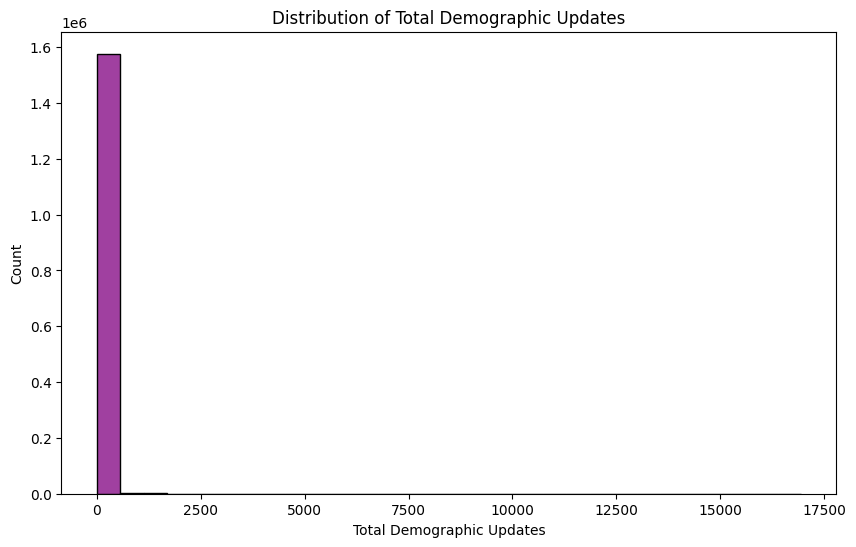

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(
    df['total_updates'],bins=30,stat='count',color='purple'
)
plt.title('Distribution of Total Demographic Updates')
plt.xlabel('Total Demographic Updates')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Average Demographic Updates')

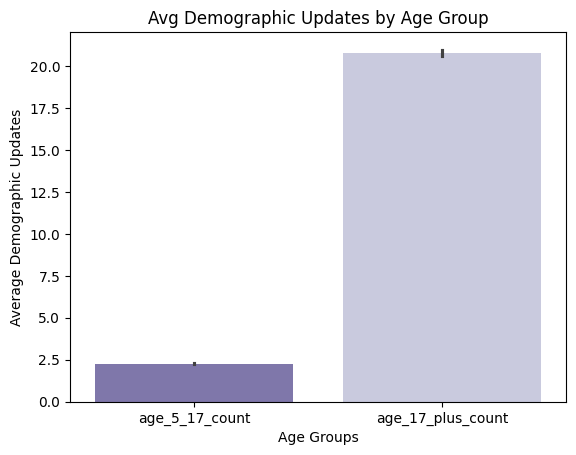

In [58]:
sns.barplot(df[['age_5_17_count','age_17_plus_count']], palette='Purples_r')
plt.title('Avg Demographic Updates by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Demographic Updates')

Text(0.5, 0, 'Date')

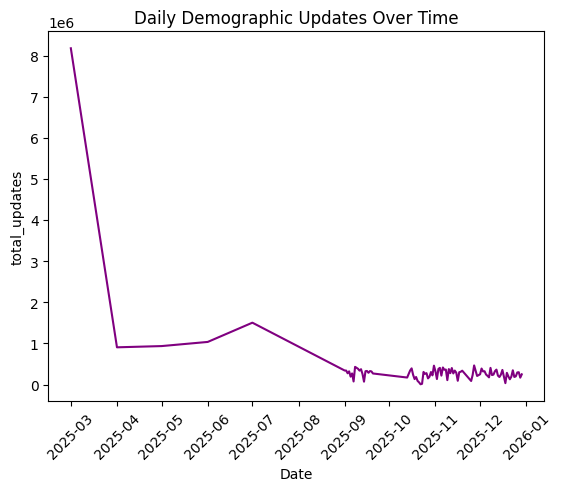

In [59]:
# Daily updates tracking
daily_demo_updates = df.groupby('date')['total_updates'].sum().reset_index()
daily_demo_updates = pd.DataFrame(daily_demo_updates)
sns.lineplot(data=daily_demo_updates, x='date', y='total_updates', color='purple')
plt.title('Daily Demographic Updates Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')

In [62]:
df.columns

Index(['date', 'state_final', 'district_clean', 'pincode', 'age_5_17_count',
       'age_17_plus_count', 'total_updates', 'day', 'day', 'month', 'month',
       'month', 'month', 'day', 'day'],
      dtype='object')

In [63]:
df = df.loc[:, ~df.columns.duplicated()]

In [64]:
# Analysing monthly updates trend
monthly_updates = df.groupby('month')['total_updates'].sum().reset_index()
monthly_updates = pd.DataFrame(monthly_updates)
monthly_updates.sort_values('total_updates', ascending=False)

,month,total_updates
0,3,8179304
8,12,7092106
7,11,7058877
5,9,5951563
6,10,3819201
4,7,1505857
3,6,1037822
2,5,936851
1,4,906721


Text(0.5, 0, 'Month')

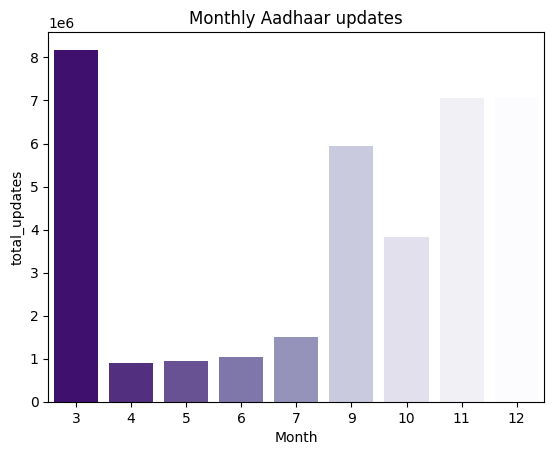

In [65]:
sns.barplot(data = monthly_updates.sort_values(by='total_updates', ascending=False), x='month', y='total_updates', palette='Purples_r',hue = 'month', legend=False)
plt.title('Monthly Aadhaar updates')
plt.xlabel('Month')

In [66]:
# weekly trends
df['day_of_week'] = df['date'].dt.day_name()
weekly_updates = df.groupby('day_of_week')['total_updates'].sum().reset_index()
weekly_updates = pd.DataFrame(weekly_updates)
weekly_updates.sort_values('total_updates', ascending=False)


C:\Users\Mrunmayee Potdar\AppData\Local\Temp\ipykernel_13540\146937648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.day_name()


,day_of_week,total_updates
2,Saturday,11497330
5,Tuesday,6151298
4,Thursday,4607820
0,Friday,4125053
1,Monday,3917673
6,Wednesday,3543885
3,Sunday,2645243


<Axes: xlabel='total_updates', ylabel='day_of_week'>

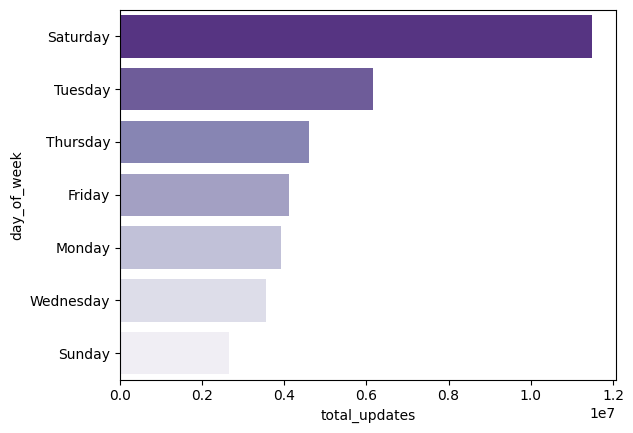

In [67]:
sns.barplot(data = weekly_updates.sort_values(by='total_updates', ascending=False), y='day_of_week', x='total_updates', palette='Purples_r', hue='day_of_week', legend=False)

In [68]:
# Which states have highest/lowest updates?
state_updates = df.groupby('state_final')['total_updates'].sum().reset_index()
state_updates = pd.DataFrame(state_updates)
state_updates = state_updates.sort_values(by='total_updates', ascending=False)
state_updates

,state_final,total_updates
34,uttarpradesh,6461332
20,maharashtra,3824891
4,bihar,3638841
35,westbengal,2799049
19,madhyapradesh,2104635
28,rajasthan,2058897
30,tamilnadu,1686874
1,andhrapradesh,1520813
6,chhattisgarh,1404459
10,gujarat,1356661


In [69]:
dist_updates = df.groupby('district_clean')['total_updates'].sum().reset_index()
district_updates = pd.DataFrame(dist_updates)
district_updates = district_updates.sort_values(by='total_updates', ascending=False)

In [70]:
district_updates.head(10)
district_updates.tail(10)

,district_clean,total_updates
154,chandauli,1
383,jyotiba phule nagar,1
543,medchalamalkajgiri,1
64,bally jagachha,1
61,balianta,1
577,naihati anandabazar,1
236,domjur,1
232,dist thane,1
852,tiruvarur,1
865,udupi,1


Text(0.5, 1.0, 'Aadhaar Updates by State')

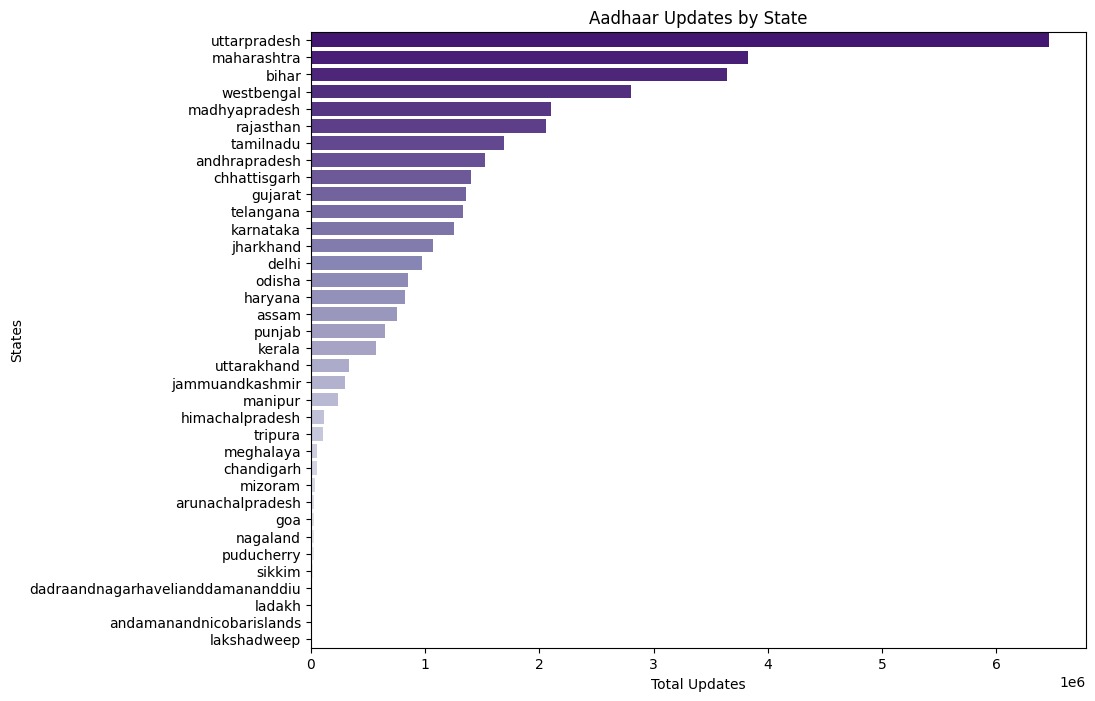

In [71]:
plt.figure(figsize=(10,8))
sns.barplot(data=state_updates, y='state_final', x='total_updates', palette='Purples_r',hue = 'state_final',legend = False)
plt.xlabel('Total Updates')
plt.ylabel('States')
plt.title('Aadhaar Updates by State')

In [72]:
df.head(2)

,date,state_final,district_clean,pincode,age_5_17_count,age_17_plus_count,total_updates,day,month,day_of_week
0,2025-03-01,uttarpradesh,gorakhpur,273213,49,529,578,1,3,Saturday
1,2025-03-01,andhrapradesh,chittoor,517132,22,375,397,1,3,Saturday


Text(0.5, 1.0, 'Overall Age Group Share in Aadhaar Updates')

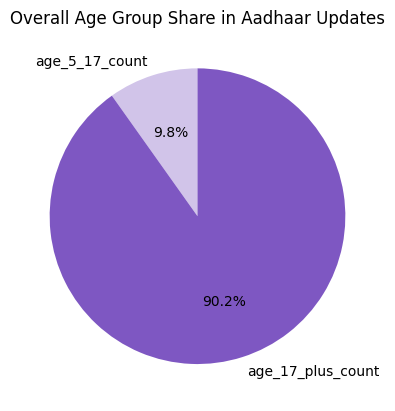

In [73]:
# Pie chart of overall age-group share.
age_group_totals = df[['age_5_17_count',	'age_17_plus_count']].sum()
age_group_totals.plot.pie(autopct='%1.1f%%', colors=['#d1c4e9', '#7e57c2'], startangle=90)
plt.title('Overall Age Group Share in Aadhaar Updates')

In [74]:
df.to_csv("demographic_cleaned.csv.gz", index=False, compression="gzip")